# Práctica Machine Learning

## Tercera iteración

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc
import pickle

C:\Users\MARIO\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


## Datos

In [2]:
with open('benchmark_data.pkl', 'rb') as handle:
    bm = pickle.load(handle)
ibex = bm['ibex']
ibex

,close,high,low,open,vol
2000-01-03,11610.0,11881.8,11574.4,11846.6,60107000.0
2000-01-04,11206.6,11530.0,11159.8,11499.5,62539000.0
2000-01-05,10863.1,11068.1,10824.9,11206.6,68153000.0
2000-01-07,11102.4,11137.9,10882.7,10963.4,144207000.0
2000-01-10,11173.3,11364.3,11120.6,11363.8,133817000.0
...,...,...,...,...,...
2019-06-04,9117.6,9138.5,8964.2,8972.7,197017094.0
2019-06-05,9150.5,9173.4,9095.0,9136.8,158753002.0
2019-06-06,9169.2,9246.2,9136.7,9169.2,212720881.0
2019-06-07,9236.1,9261.4,9185.7,9186.7,150664687.0


In [3]:
def bucle_etiquetado (n,window):
    etiquetas = np.zeros(n)
    idfechas = np.zeros(n)
    for i in range(n):
        idx = np.random.randint(0, ibex.shape[0] - window)
        idfechas[i] = idx
        windata = ibex.iloc[idx:idx+window]
        fig, ax = plt.subplots(figsize=(6,4))
        _ = candlestick2_ohlc(ax, windata.open, windata.high,
                             windata.low, windata.close,
                             colorup='g', colordown='r', width=0.66, alpha=0.8)
        plt.show()
        print(f'Ejemplo {i+1} de {n}')
        print("Etiquete la siguiete grafica como:")
        print(" [1] Doble suelo, [0] Sin doble suelo, [2] Descartar ejemplo")
        opcion_usuario = input()
        if opcion_usuario >= '0' and opcion_usuario <= '2':
            etiquetas[i] = opcion_usuario   
        else:
            print('Error en la opción introducida. Ejemplo descartado')
            etiquetas[i] = 2
    doble_suelo_labels = pd.Series(etiquetas, index=ibex.index[idfechas.astype(int)])
    doble_suelo_labels = doble_suelo_labels[doble_suelo_labels!=2]
    doble_suelo_labels = doble_suelo_labels[doble_suelo_labels!=0]
    doble_suelo_labels = pd.DataFrame(doble_suelo_labels).reset_index()
    doble_suelo_labels.columns = ['fecha','etiqueta']
    return doble_suelo_labels

Para esta tercera parte, se vuelve a utilizar el bucle de etiquetado de la primera y con ello el conjunto de datos de etiquetado correspondientes a la primera iteración. Sin embargo, se han añadido más muestras de forma que la cantidad de datos de cada clase esten más balanceados con el fin de que el modelo sea un poco más robusto y no tenga los mismos problemas que los modelos de la primera iteración.

In [4]:
etiquetado_labels = pd.read_csv("etiquetas3.csv")
etiquetado_labels = etiquetado_labels.drop(["Unnamed: 0"],axis = 1)
etiquetado_labels

,fecha,etiqueta
0,2005-03-17,0.0
1,2017-08-01,0.0
2,2014-11-03,0.0
3,2012-12-18,0.0
4,2002-12-04,0.0
...,...,...
96,2014-03-10 00:00:00,1.0
97,2009-04-20,1.0
98,2004-12-28 00:00:00,1.0
99,2005-01-03 00:00:00,1.0


In [5]:
datos_ohlc = {}
for fecha in range(len(etiquetado_labels.fecha)):
    idx = ibex.index.get_loc(etiquetado_labels.fecha.iloc[fecha])
    win_data = ibex.iloc[idx:idx+30]
    datos_ohlc[fecha] = win_data
datos_ohlc

{0:              close    high     low    open          vol
 2005-03-17  9235.8  9260.9  9158.0  9197.9  156500000.0
 2005-03-18  9263.9  9300.8  9239.7  9254.4  164952000.0
 2005-03-21  9225.4  9287.1  9215.7  9236.9  141049000.0
 2005-03-22  9299.2  9306.2  9209.5  9234.1  136037000.0
 2005-03-23  9252.1  9277.1  9196.8  9206.0  126386000.0
 2005-03-24  9309.3  9329.1  9244.9  9265.2   90959000.0
 2005-03-29  9324.1  9331.2  9234.1  9266.1  110772000.0
 2005-03-30  9280.1  9305.1  9245.5  9277.3  107039000.0
 2005-03-31  9258.8  9355.8  9240.5  9333.7  150740000.0
 2005-04-01  9289.5  9338.3  9244.7  9254.7  168740000.0
 2005-04-04  9206.0  9261.0  9164.3  9257.3  189303000.0
 2005-04-05  9298.1  9304.3  9239.3  9246.4  119126000.0
 2005-04-06  9382.1  9382.1  9316.6  9320.3  140768000.0
 2005-04-07  9392.4  9407.1  9335.0  9377.0  132092000.0
 2005-04-08  9385.8  9442.2  9369.7  9439.1  109949000.0
 2005-04-11  9334.8  9355.7  9311.2  9341.0  132922000.0
 2005-04-12  9303.1  9335.7 

## Características

Se tienen las mismas características que en las anteriores iteraciones

In [6]:
def retorno_ventana(data):
    r = data.close.iloc[-1]/data.close.iloc[0] - 1
    return r 

In [7]:
def dif_dias_max_min (data):
    
    dia_max = data["close"][data["close"] == data["close"].max()].index[0]
    dia_min = data["close"][data["close"] == data["close"].min()].index[0]
    dif_dias = dia_max - dia_min

    return abs(dif_dias.days)

In [8]:
def cruce_umbral (data,porcent_umbral = 0.1):
    
    precio_min = data["close"][data["close"] == data["close"].min()].values
    precio_max = data["close"][data["close"] == data["close"].max()].values
    umbral = precio_min + porcent_umbral*(precio_max-precio_min)
    n_datos_inf_umbral = data.close[data.close <= umbral[0]].shape[0]
    return n_datos_inf_umbral

In [9]:
def orden_max_min (data):
    
    dia_max = data["close"][data["close"] == data["close"].max()].index[0]
    dia_min = data["close"][data["close"] == data["close"].min()].index[0]
    
    if dia_max > dia_min :
        etiqueta = 1
    else:
        etiqueta = 0
    
    return etiqueta

In [10]:
def cruce_umbral2 (data,porcent_umbral = 0.1):
    
    precio_min = data["close"][data["close"] == data["close"].min()].values
    precio_max = data["close"][data["close"] == data["close"].max()].values
    umbral = precio_max - porcent_umbral*(precio_max-precio_min)
    n_datos_inf_umbral = data.close[data.close >= umbral[0]].shape[0]
    return n_datos_inf_umbral

In [11]:
def coef_variacion (data):
    
    desv = data.close.std()
    media = data.close.mean()
    return desv/media

In [12]:
def obtener_caract_datos (datos_ohlc,doble_suelo_labels):
    
    """ 
    Obtiene las características y etiquetas de los 
    gráficos etiquetados a partir de los datos OHLC.
    """

    columnas = ["Retorno", 
                "Dif. dias extremos",
                "Nº veces cruce umbral inferior",
                "Orden extremos",
                "Nº veces cruce umbral superior",
                "Coeficiente de variación"]
    datos_caract = pd.DataFrame(columns = columnas)
    for i in datos_ohlc.keys():
        data = datos_ohlc[i]
        r = retorno_ventana(data)
        dif_dias = dif_dias_max_min (data)
        n_cruc_umbral = cruce_umbral (data,porcent_umbral = 0.1)
        n_cruc_umbral2 = cruce_umbral2 (data,porcent_umbral = 0.1)
        orden_extremos = orden_max_min (data)
        coef_var = coef_variacion (data)
        caract = [r,dif_dias,n_cruc_umbral,orden_extremos,n_cruc_umbral2,coef_var]
        caract = pd.DataFrame([caract],columns = columnas)
        datos_caract = pd.concat([datos_caract,caract],axis = 0)
    
    datos_caract = datos_caract.reset_index().drop("index",axis = 1)
    datos_caract = pd.concat([datos_caract,doble_suelo_labels.etiqueta],axis = 1)

    return datos_caract

In [13]:
datos = obtener_caract_datos (datos_ohlc,etiquetado_labels)
datos

,Retorno,Dif. dias extremos,Nº veces cruce umbral inferior,Orden extremos,Nº veces cruce umbral superior,Coeficiente de variación,etiqueta
0,-0.025358,20,5,0,5,0.014932,0.0
1,-0.024946,30,4,0,2,0.016140,0.0
2,-0.022112,28,6,1,2,0.023567,0.0
3,0.023688,28,3,1,4,0.021231,0.0
4,-0.031108,17,2,1,3,0.023355,0.0
...,...,...,...,...,...,...,...
96,0.023856,21,1,1,2,0.021567,1.0
97,0.104689,41,2,1,1,0.030106,1.0
98,0.041170,27,3,1,3,0.017045,1.0
99,0.050515,30,4,1,2,0.021581,1.0


Se dividen los datos en train y test, en este caso en un 60-40% puesto que los datos de entrenamiento iran aumentando con las iteraciones de aprendije activo mientras que la parte de test sera la misma para cada iteración y es con la que se evaluará el modelo al final de cada iteración. En este caso, se divide en 50-50% los datos de train y test con el objetivo de que haya mas datos de test para poder probar la mejoría tras cada re-entrenamiento y que haya menos datos de train para que sea más sensible a los cambios que puedan producir los nuevos patrones añadidos mediante el aprendizaje activo.

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(datos.drop("etiqueta",axis = 1).values,
                                                    datos.etiqueta.values,
                                                    test_size=0.5,
                                                    stratify=datos.etiqueta.values,
                                                    random_state = 2
                                                   )

In [15]:
vals, counts = np.unique(y_train, return_counts=True)
dict(zip(vals, counts))

{0.0: 31, 1.0: 19}

In [16]:
vals, counts = np.unique(y_test, return_counts=True)
dict(zip(vals, counts))

{0.0: 32, 1.0: 19}

## Entrenamiento Modelo

Se ha elegido un modelo Random Forest para esta iteración

In [17]:
from sklearn.ensemble import  RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 200)
_ = modelo.fit(x_train, y_train)

## Test del modelo

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [19]:
test_predicted = modelo.predict(x_test)
test_predicted

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.])

### Metricas

**Matriz de confusión**

In [20]:
matriz_conf = confusion_matrix(y_test, test_predicted)
matriz_conf

array([[25,  7],
       [ 4, 15]], dtype=int64)

**Accuracy**

In [21]:
accuracy = accuracy_score(y_test, test_predicted)
accuracy

0.7843137254901961

**Auroc**

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, test_predicted)
auroc = auc(fpr, tpr)
auroc

0.7853618421052632

**Curva ROC**

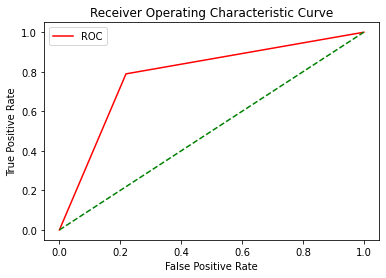

In [23]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

Feature: 0, Score: 0.35743
Feature: 1, Score: 0.17665
Feature: 2, Score: 0.08473
Feature: 3, Score: 0.04912
Feature: 4, Score: 0.11352
Feature: 5, Score: 0.21855


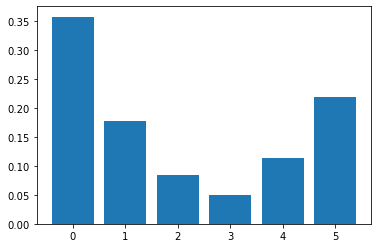

In [24]:
importance = modelo.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Bucle de predicción

El siguiente bucle de etiquetado funciona de forma parecida a los ya mostrados en otras iteraciones. En este caso, genera n ventanas aleatorias que son evaluadas por el modelo donde se guardaran aquellas donde la predicción de la probabilidad de etiquetado almacenando estan en un umbral cercano a la frontera de decisión seleccionada [0.4;0.6]. Tras esto se etiquetan a mano estas ventanas y se guardan para ser añadidas al resto de datos de entrenamiento para el re-entrenamiento del modelo.

In [25]:
def bucle_etiq_por_probabilidad (n,window,modelo,etiquetado_labels):
    
    etiquetas = np.zeros(n)
    idfechas = np.zeros(n)
    datos_ohlc = {}
    
    for i in range(n):
        idx = np.random.randint(0, ibex.shape[0] - window)
        idfechas[i] = idx
        windata = ibex.iloc[idx:idx+window]
        datos_ohlc[i] = windata
    
    columnas = ["retorno", "dif_dias_extremos","n_veces_cruce_umbral","orden_extremos","n_veces_cruce_umbral2","coef_variacion"]
    datos_caract = pd.DataFrame(columns = columnas)
    
    for i in datos_ohlc.keys():
        data = datos_ohlc[i]
        r = retorno_ventana(data)
        dif_dias = dif_dias_max_min (data)
        n_cruc_umbral = cruce_umbral (data,porcent_umbral = 0.1)
        n_cruc_umbral2 = cruce_umbral2 (data,porcent_umbral = 0.1)
        orden_extremos = orden_max_min (data)
        coef_var = coef_variacion (data)
        caract = [r,dif_dias,n_cruc_umbral,orden_extremos,
                  n_cruc_umbral2,
                  coef_var]
        caract = pd.DataFrame([caract],columns = columnas)
        datos_caract = pd.concat([datos_caract,caract],axis = 0)
    
    datos_caract = datos_caract.reset_index().drop("index",axis = 1)
    probabilidades = modelo.predict_proba(datos_caract)
    
    etiqueta = []
    fecha = []
    for i in range(len(probabilidades)):
        
        if not datos_ohlc[i].index[0] in etiquetado_labels.fecha.unique():
            
            if (probabilidades[i][0] >= 0.4) and (probabilidades[i][0] <= 0.6):

                windata = datos_ohlc[i]
                fig, ax = plt.subplots(figsize=(6,4))
                _ = candlestick2_ohlc(ax, windata.open, windata.high,
                                     windata.low, windata.close,
                                     colorup='g', colordown='r', width=0.66, alpha=0.8)
                plt.show()
                print(f'Ejemplo {i+1} de {n}')
                print("Etiquete la siguiete grafica como:")
                print(" [1] Doble suelo, [0] Sin doble suelo")
                opcion_usuario = input()
                if opcion_usuario >= '0' and opcion_usuario < '2':
                    etiquetas[i] = opcion_usuario   
                else:
                    print('Error en la opción introducida. Ejemplo descartado')  

                etiqueta.append(etiquetas[i])
                fecha.append(windata.index[0])

    datos_re_entreno = pd.DataFrame(list(zip(fecha,etiqueta)),columns = ["fecha","etiqueta"])
    
    return datos_re_entreno

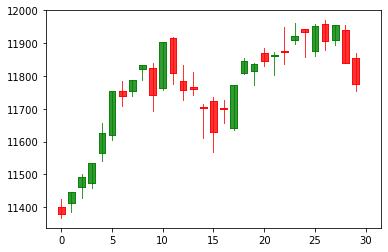

Ejemplo 6 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


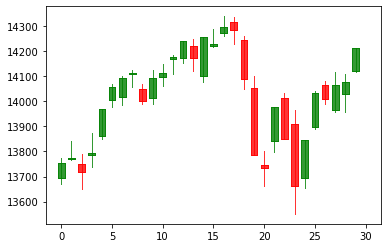

Ejemplo 11 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


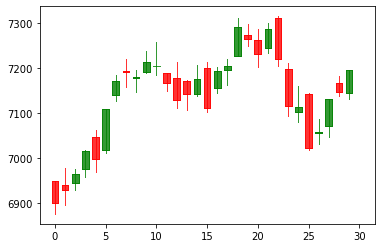

Ejemplo 13 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


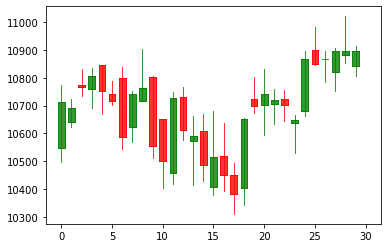

Ejemplo 17 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


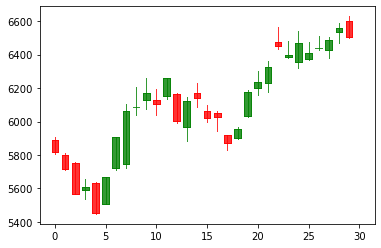

Ejemplo 21 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


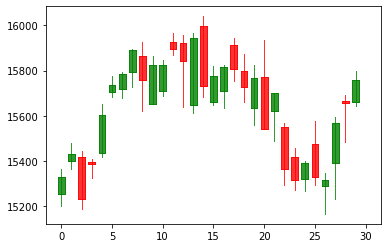

Ejemplo 26 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


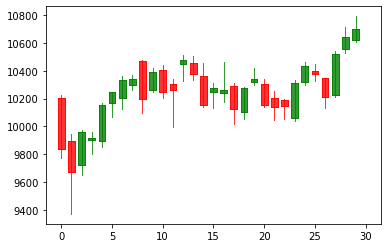

Ejemplo 27 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


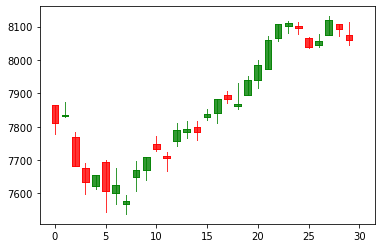

Ejemplo 31 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


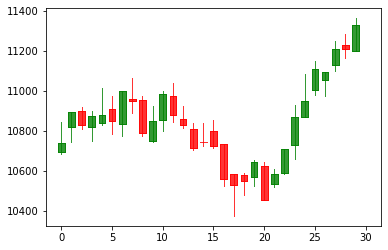

Ejemplo 32 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


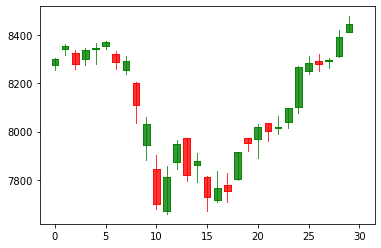

Ejemplo 33 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


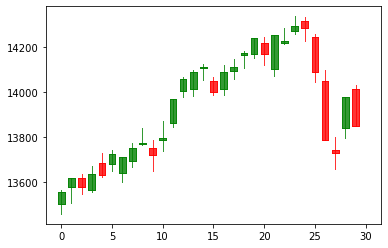

Ejemplo 34 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


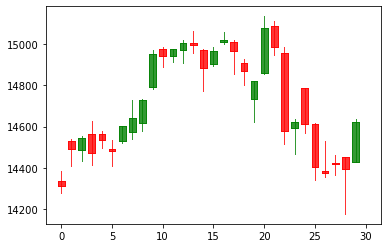

Ejemplo 35 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


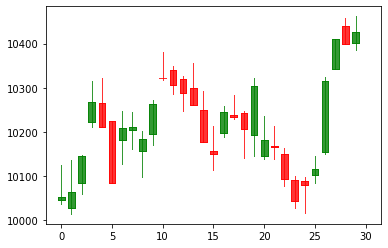

Ejemplo 39 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


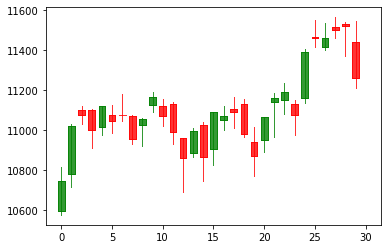

Ejemplo 40 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


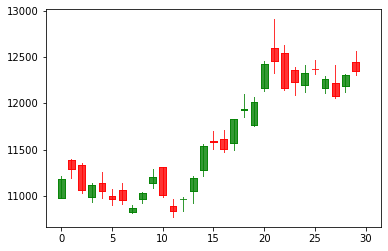

Ejemplo 43 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


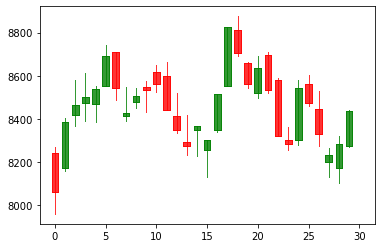

Ejemplo 58 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


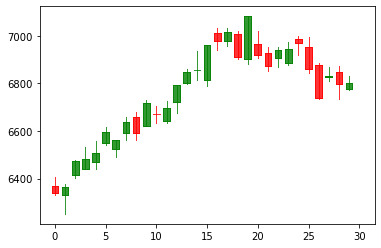

Ejemplo 59 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


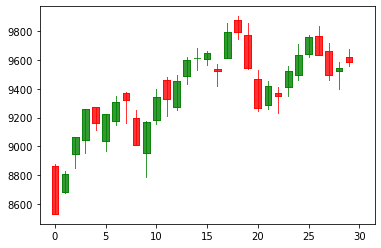

Ejemplo 68 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


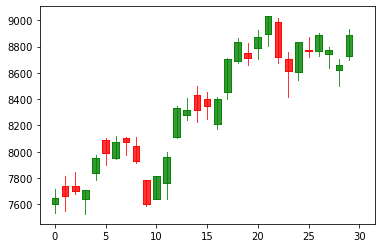

Ejemplo 71 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


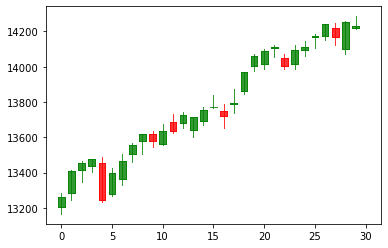

Ejemplo 72 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


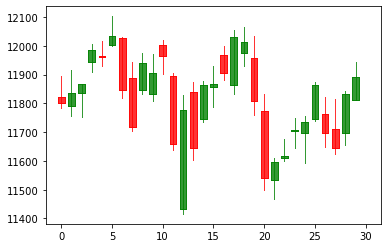

Ejemplo 80 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


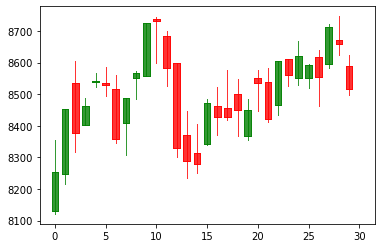

Ejemplo 84 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


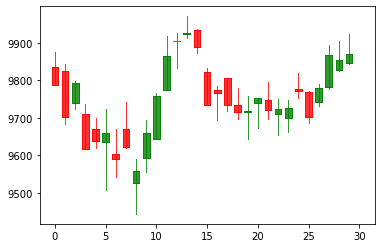

Ejemplo 86 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


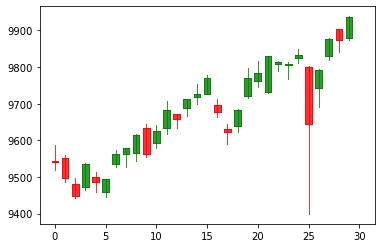

Ejemplo 87 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


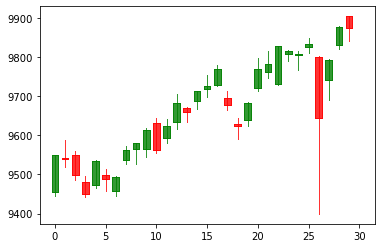

Ejemplo 89 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


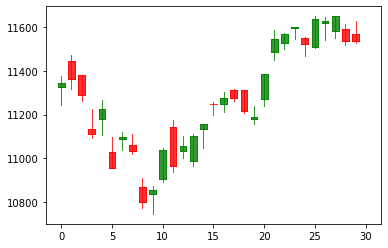

Ejemplo 95 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


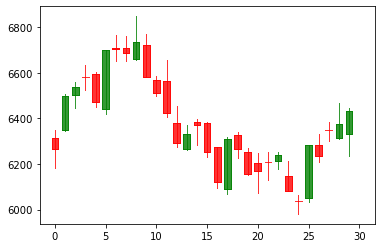

Ejemplo 97 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


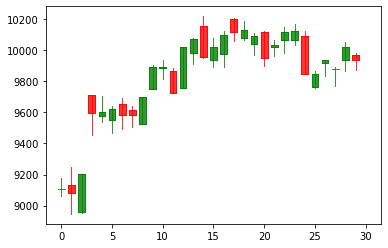

Ejemplo 117 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


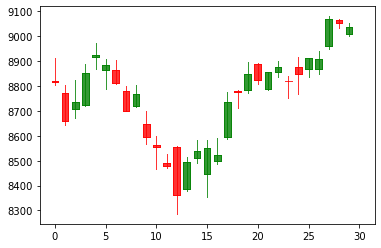

Ejemplo 124 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


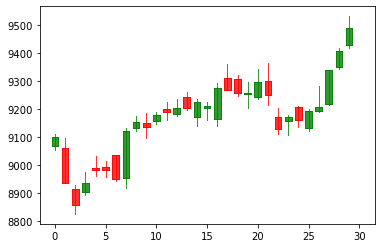

Ejemplo 129 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


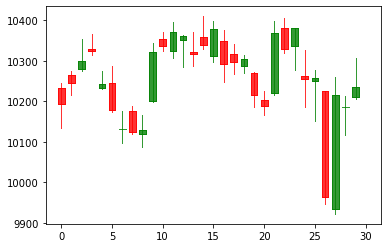

Ejemplo 136 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


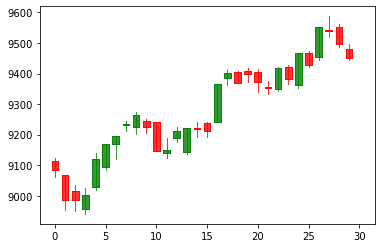

Ejemplo 149 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


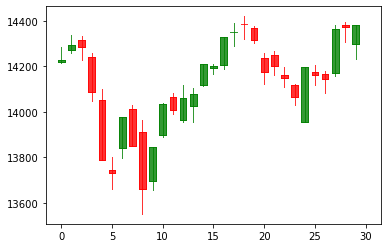

Ejemplo 153 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


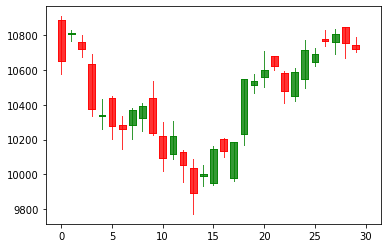

Ejemplo 157 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


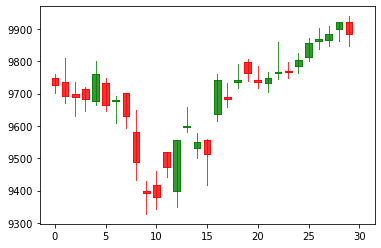

Ejemplo 164 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


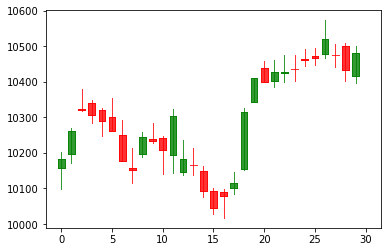

Ejemplo 170 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


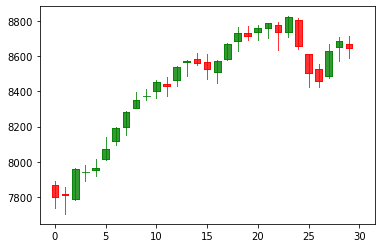

Ejemplo 184 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


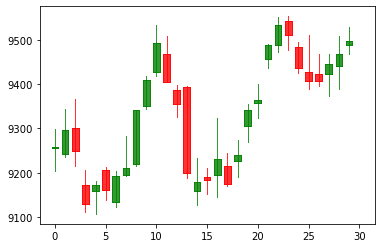

Ejemplo 185 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


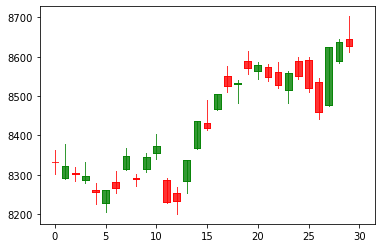

Ejemplo 188 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


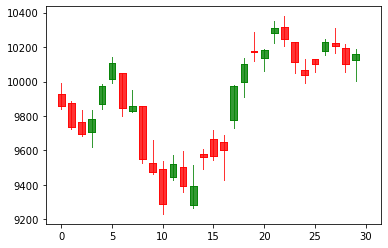

Ejemplo 193 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


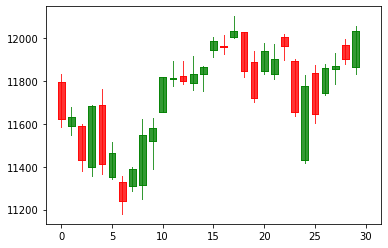

Ejemplo 195 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


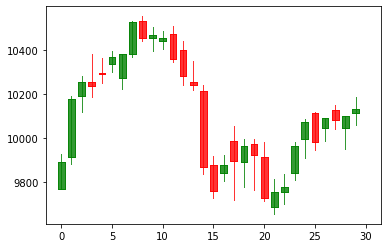

Ejemplo 197 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


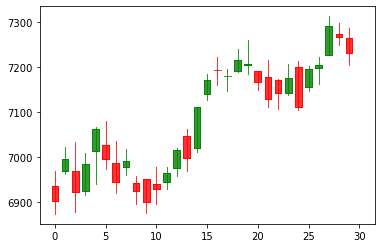

Ejemplo 198 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


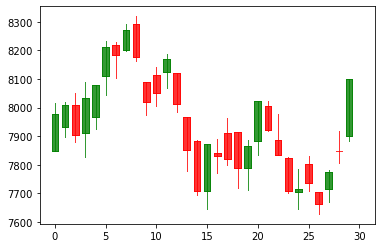

Ejemplo 199 de 200
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


In [26]:
datos_re_entreno = bucle_etiq_por_probabilidad (200,30,modelo,etiquetado_labels)

In [27]:
datos_re_entreno
datos_ohlc_reent = {}
for fecha in range(len(datos_re_entreno.fecha)):
    idx = ibex.index.get_loc(datos_re_entreno.fecha.iloc[fecha])
    win_data = ibex.iloc[idx:idx+30]
    datos_ohlc_reent[fecha] = win_data
datos_reent = obtener_caract_datos (datos_ohlc_reent,datos_re_entreno)
x_train_new = datos_reent.drop("etiqueta",axis = 1).values
y_train_new = datos_reent.etiqueta.values

## Re-entrenamiento del clasificador

Con los nuevos datos añadidos y tras calcular sus características, se procede a re-entrenar el clasificador.

In [28]:
x_train = np.vstack([x_train,x_train_new])
y_train = np.append(y_train,y_train_new,axis = 0)

In [29]:
modelo = RandomForestClassifier(n_estimators = 200)
_ = modelo.fit(x_train, y_train)

## Test del modelo con re-entrenamiento

Se testean el modelo tras el re-entrenamiento para estudiar la mejora de las métricas.

In [30]:
test_predicted = modelo.predict(x_test)
test_predicted

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

### Metricas

**Matriz de confusión**

In [31]:
matriz_conf = confusion_matrix(y_test, test_predicted)
matriz_conf

array([[30,  2],
       [11,  8]], dtype=int64)

**Accuracy**

In [32]:
accuracy = accuracy_score(y_test, test_predicted)
accuracy

0.7450980392156863

**Auroc**

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, test_predicted)
auroc = auc(fpr, tpr)
auroc

0.6792763157894737

**Curva ROC**

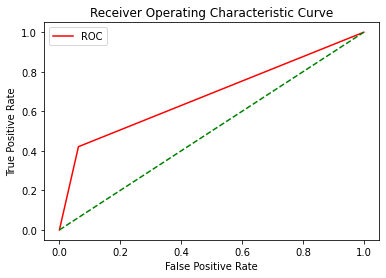

In [34]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

Feature: 0, Score: 0.26332
Feature: 1, Score: 0.20147
Feature: 2, Score: 0.12608
Feature: 3, Score: 0.02837
Feature: 4, Score: 0.12825
Feature: 5, Score: 0.25250


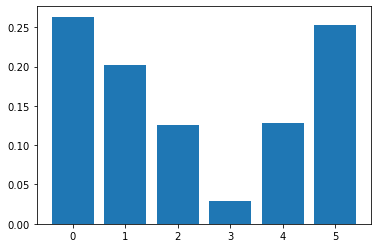

In [35]:
importance = modelo.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Como se puede observar por las métricas de evaluación, el modelo ha empeorado tras el re-entrenamiento perdiendo accuracy y teniendo peor AUROC y curva ROC que el primero sin re-entrenamiento. Esto puede ser debido a que se añaden muchas gráficas etiquetadas nuevas (los datos de train son casi el doble que antes) por lo que el modelo cambia mucho debido a esto o dado que el conjunto de test no es muy grande, las mejoras asociadas podrían no verse reflejadas o ser significativas para este conjunto en particular.

## Re-entrenamiento del clasificador (varias iteraciones)

Se re-entrena el clasificador con varias iteraciones de la misma forma que en la etapa anterior y se evaluan las métricas para comprobar si las diferentes iteraciones de re-entrenamientos han ayudado a mejorar el clasificador.

### Primera iteración

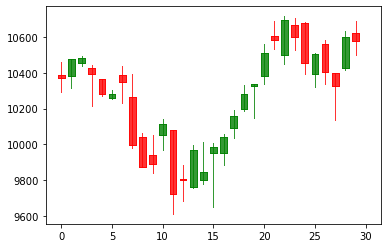

Ejemplo 3 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


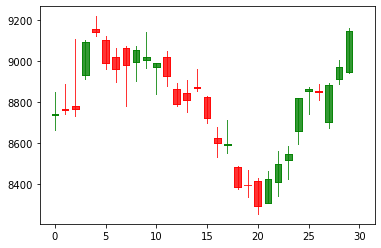

Ejemplo 4 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


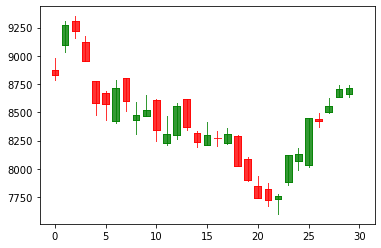

Ejemplo 5 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


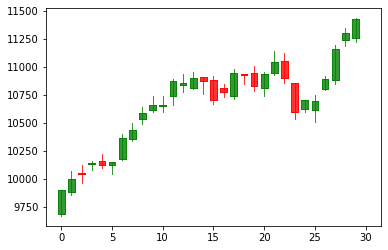

Ejemplo 6 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


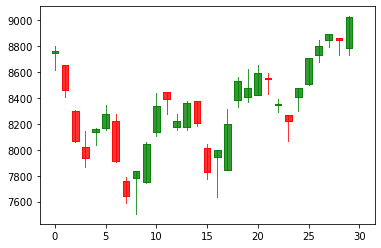

Ejemplo 14 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


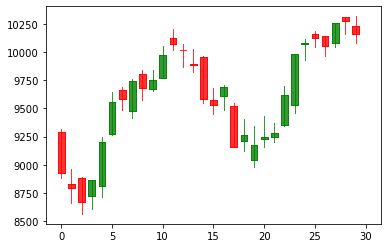

Ejemplo 16 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


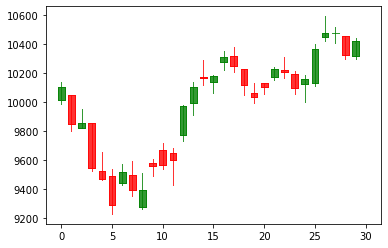

Ejemplo 20 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


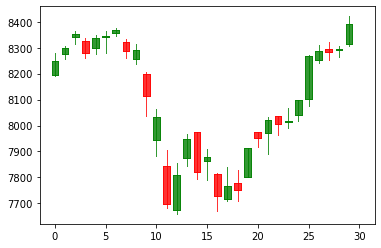

Ejemplo 23 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


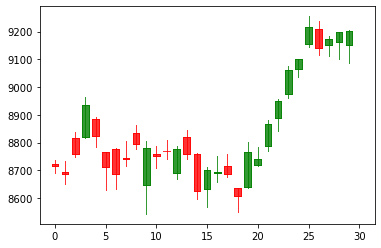

Ejemplo 31 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


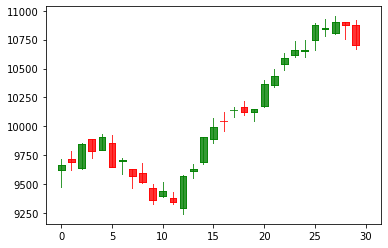

Ejemplo 38 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


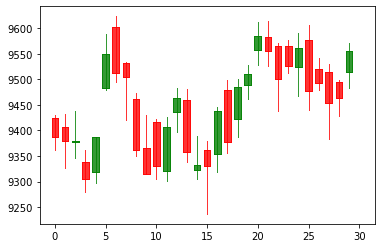

Ejemplo 50 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


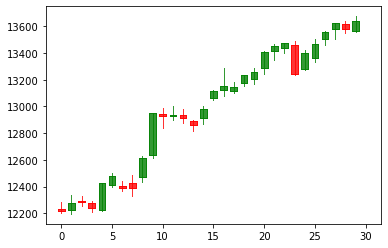

Ejemplo 51 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


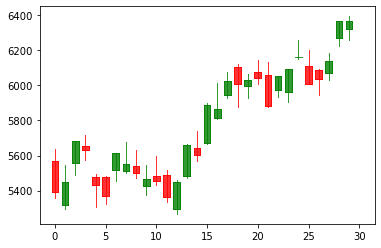

Ejemplo 59 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


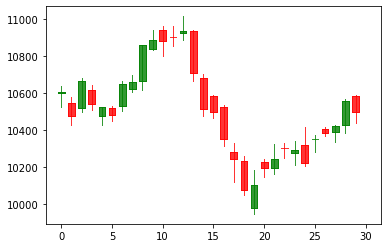

Ejemplo 61 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


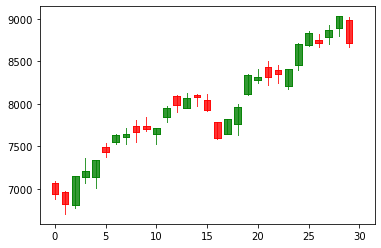

Ejemplo 72 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


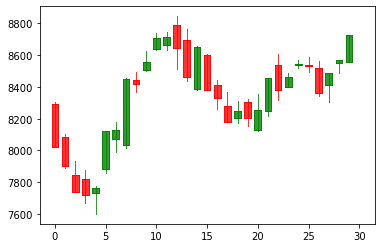

Ejemplo 73 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


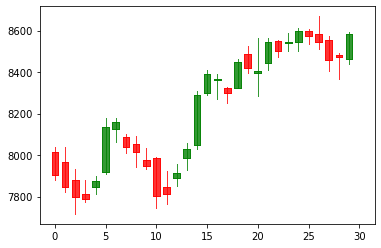

Ejemplo 74 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


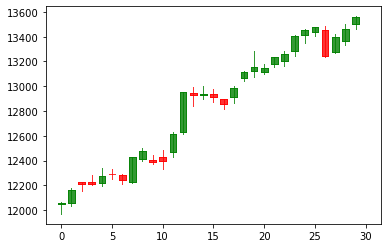

Ejemplo 75 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


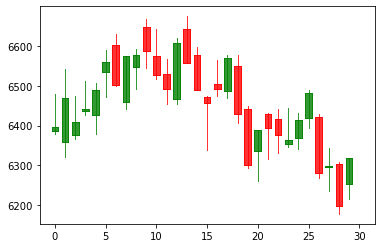

Ejemplo 77 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


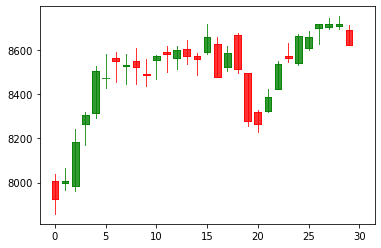

Ejemplo 83 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


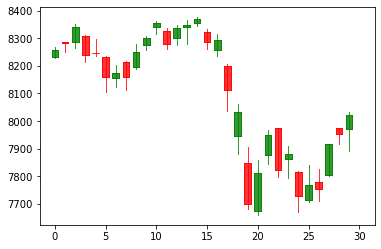

Ejemplo 86 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


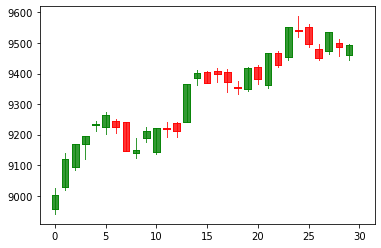

Ejemplo 87 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


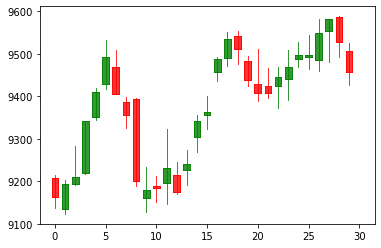

Ejemplo 88 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


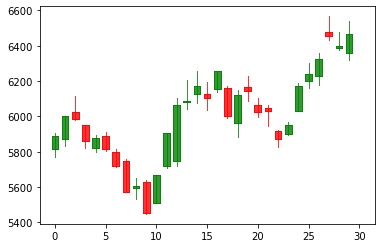

Ejemplo 89 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


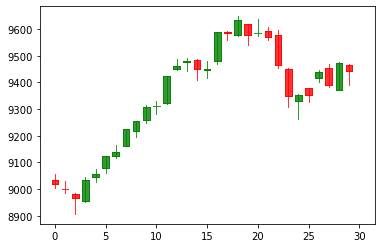

Ejemplo 91 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


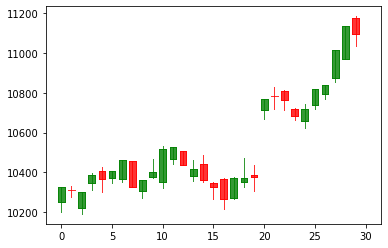

Ejemplo 97 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


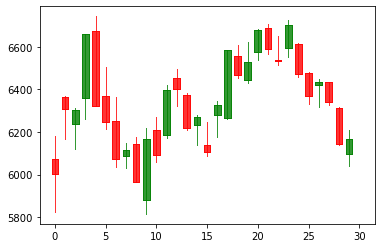

Ejemplo 104 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


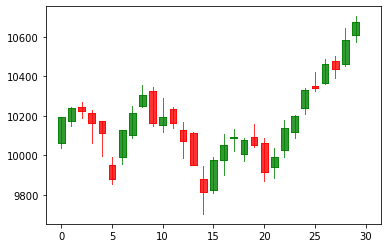

Ejemplo 112 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


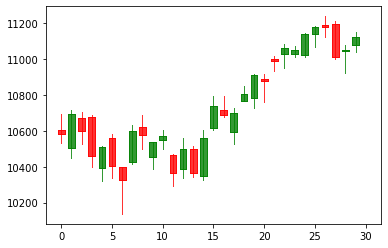

Ejemplo 114 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


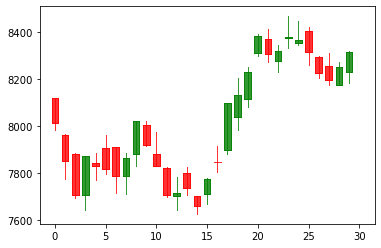

Ejemplo 115 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


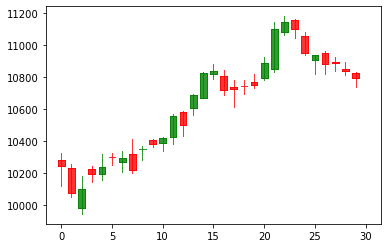

Ejemplo 118 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


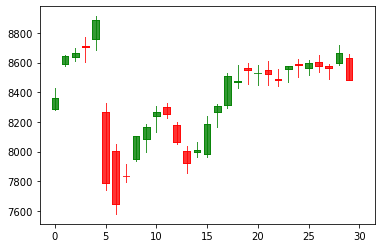

Ejemplo 122 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


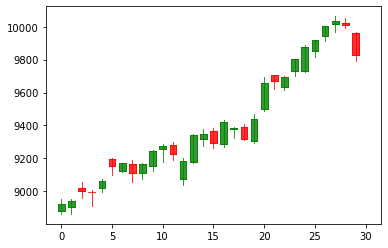

Ejemplo 126 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


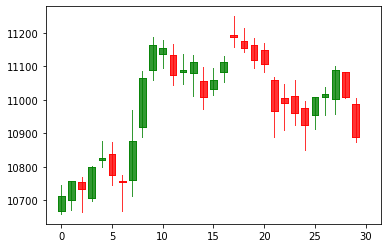

Ejemplo 127 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


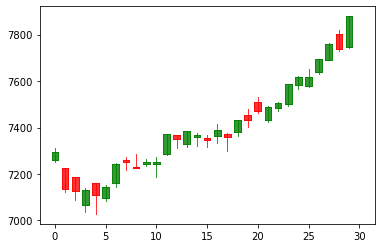

Ejemplo 137 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


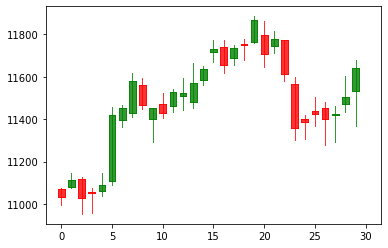

Ejemplo 141 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


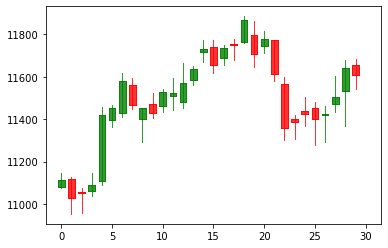

Ejemplo 143 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


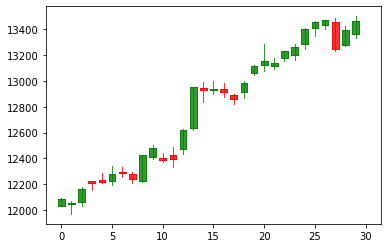

Ejemplo 145 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


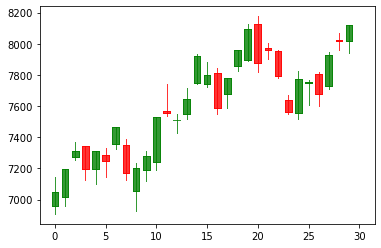

Ejemplo 147 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


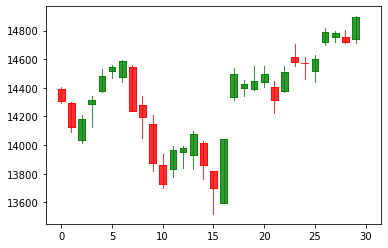

Ejemplo 148 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


In [36]:
datos_re_entreno = bucle_etiq_por_probabilidad (150,30,modelo,etiquetado_labels)

In [37]:
datos_ohlc_reent = {}
for fecha in range(len(datos_re_entreno.fecha)):
    idx = ibex.index.get_loc(datos_re_entreno.fecha.iloc[fecha])
    win_data = ibex.iloc[idx:idx+30]
    datos_ohlc_reent[fecha] = win_data
datos_reent = obtener_caract_datos (datos_ohlc_reent,datos_re_entreno)
x_train_new = datos_reent.drop("etiqueta",axis = 1).values
y_train_new = datos_reent.etiqueta.values

In [38]:
x_train = np.vstack([x_train,x_train_new])
y_train = np.append(y_train,y_train_new,axis = 0)

modelo = RandomForestClassifier(n_estimators = 200)
_ = modelo.fit(x_train, y_train)

**Resultados evaluación**

In [39]:
test_predicted = modelo.predict(x_test)
test_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.])

**Matriz de confusión**

In [40]:
matriz_conf = confusion_matrix(y_test, test_predicted)
matriz_conf

array([[32,  0],
       [ 9, 10]], dtype=int64)

**Accuracy**

In [41]:
accuracy = accuracy_score(y_test, test_predicted)
accuracy

0.8235294117647058

**Auroc**

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, test_predicted)
auroc = auc(fpr, tpr)
auroc

0.763157894736842

**Curva ROC**

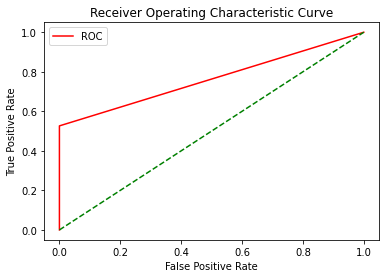

In [43]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

Feature: 0, Score: 0.29555
Feature: 1, Score: 0.18580
Feature: 2, Score: 0.09760
Feature: 3, Score: 0.02196
Feature: 4, Score: 0.11905
Feature: 5, Score: 0.28004


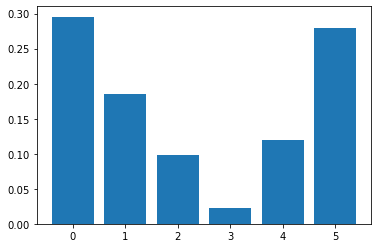

In [44]:
importance = modelo.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Tras este segundo re-entrenamiento, las métricas mejoran considerablemente en comparación al anterior re-entrenamiento y también mejoran las obtenidas con el modelo original. Al introducir más datos de train, el modelo se vuelve más robusto y se adapta mejor a la realidad que los anterior.

### Segunda iteración

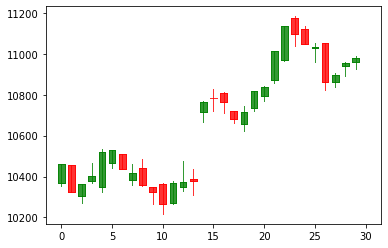

Ejemplo 19 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


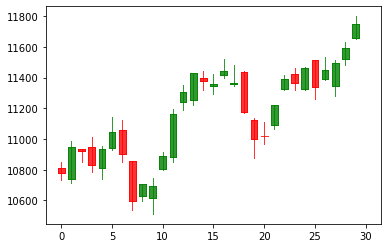

Ejemplo 20 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


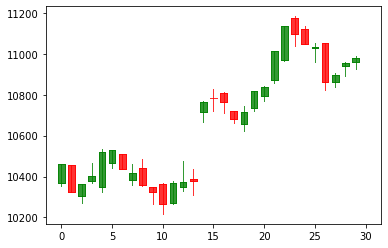

Ejemplo 23 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


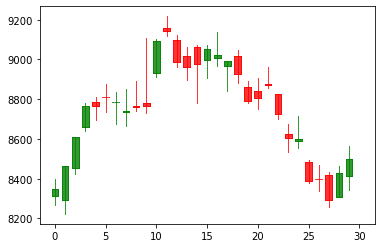

Ejemplo 38 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


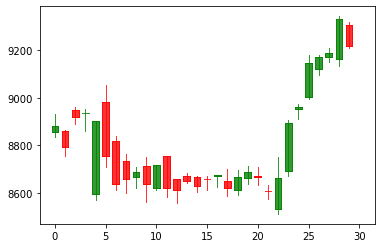

Ejemplo 45 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


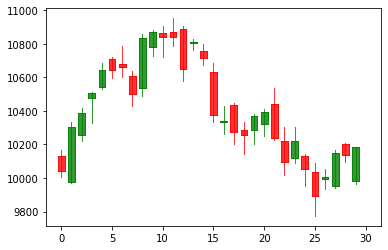

Ejemplo 52 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


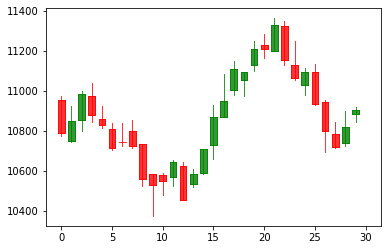

Ejemplo 55 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


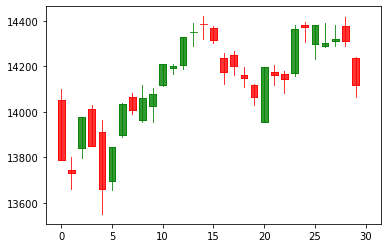

Ejemplo 56 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


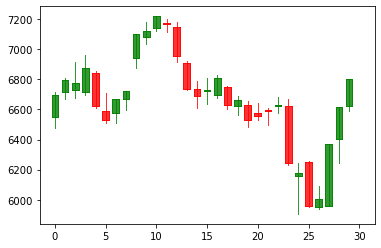

Ejemplo 66 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


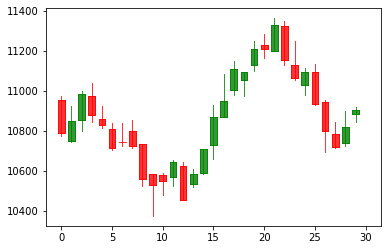

Ejemplo 77 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


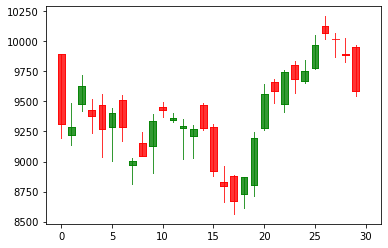

Ejemplo 98 de 100
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


In [45]:
datos_re_entreno = bucle_etiq_por_probabilidad (100,30,modelo,etiquetado_labels)

In [46]:
datos_ohlc_reent = {}
for fecha in range(len(datos_re_entreno.fecha)):
    idx = ibex.index.get_loc(datos_re_entreno.fecha.iloc[fecha])
    win_data = ibex.iloc[idx:idx+30]
    datos_ohlc_reent[fecha] = win_data
datos_reent = obtener_caract_datos (datos_ohlc_reent,datos_re_entreno)
x_train_new = datos_reent.drop("etiqueta",axis = 1).values
y_train_new = datos_reent.etiqueta.values

In [47]:
x_train = np.vstack([x_train,x_train_new])
y_train = np.append(y_train,y_train_new,axis = 0)

modelo = RandomForestClassifier(n_estimators = 200)
_ = modelo.fit(x_train, y_train)

**Resultados evaluación**

In [48]:
test_predicted = modelo.predict(x_test)
test_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.])

**Matriz de confusión**

In [49]:
matriz_conf = confusion_matrix(y_test, test_predicted)
matriz_conf

array([[32,  0],
       [ 9, 10]], dtype=int64)

**Accuracy**

In [50]:
accuracy = accuracy_score(y_test, test_predicted)
accuracy

0.8235294117647058

**Auroc**

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, test_predicted)
auroc = auc(fpr, tpr)
auroc

0.763157894736842

**Curva ROC**

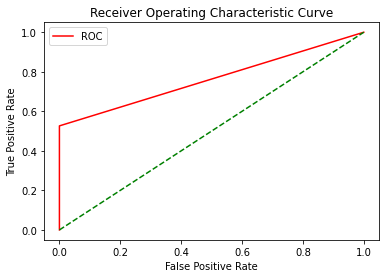

In [52]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

Feature: 0, Score: 0.25892
Feature: 1, Score: 0.20884
Feature: 2, Score: 0.11005
Feature: 3, Score: 0.02452
Feature: 4, Score: 0.12413
Feature: 5, Score: 0.27353


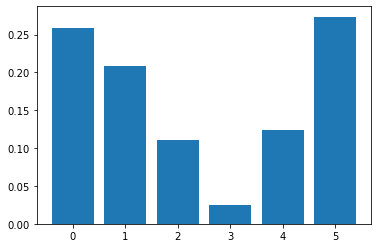

In [53]:
importance = modelo.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Tras un nuevo re-entrenamiento, el modelo no ha mejorado ni empeorado con respecto al anterior manteniendo las mismas métricas que el de la 2ª iteración.

### Tercera iteración

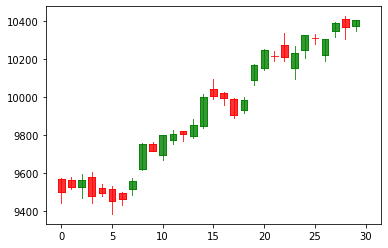

Ejemplo 67 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


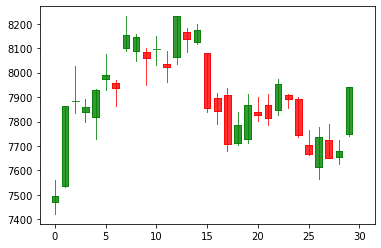

Ejemplo 69 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


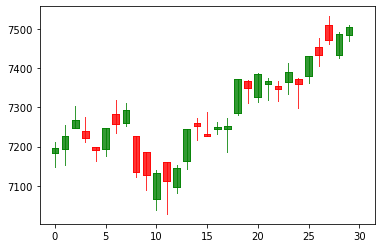

Ejemplo 74 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


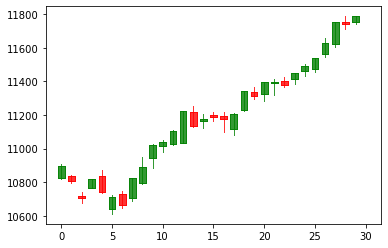

Ejemplo 82 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


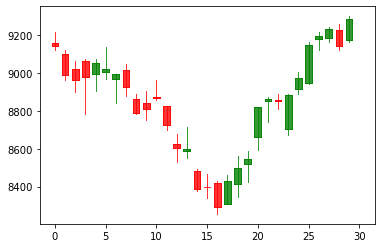

Ejemplo 83 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


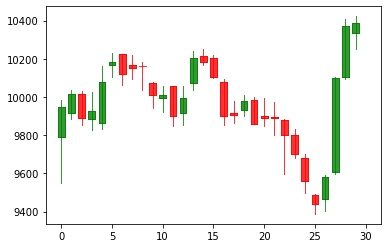

Ejemplo 86 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


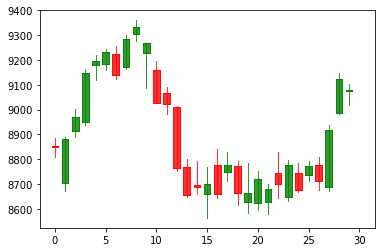

Ejemplo 106 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


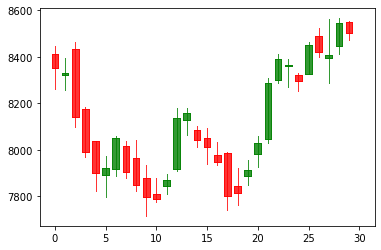

Ejemplo 124 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 1


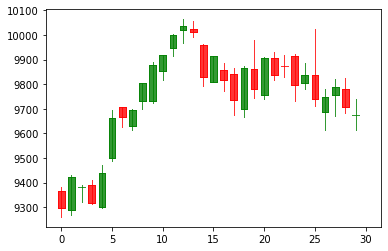

Ejemplo 127 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 3


Error en la opción introducida. Ejemplo descartado


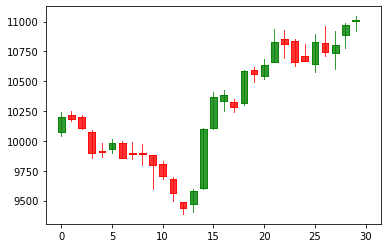

Ejemplo 131 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


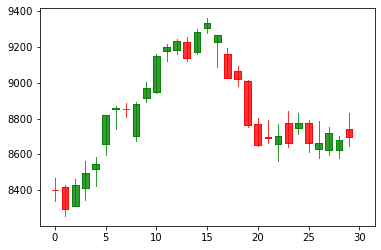

Ejemplo 140 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


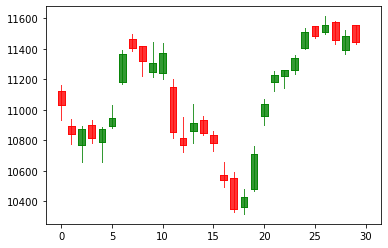

Ejemplo 142 de 150
Etiquete la siguiete grafica como:
 [1] Doble suelo, [0] Sin doble suelo


 0


In [54]:
datos_re_entreno = bucle_etiq_por_probabilidad (150,30,modelo,etiquetado_labels)

In [55]:
datos_ohlc_reent = {}
for fecha in range(len(datos_re_entreno.fecha)):
    idx = ibex.index.get_loc(datos_re_entreno.fecha.iloc[fecha])
    win_data = ibex.iloc[idx:idx+30]
    datos_ohlc_reent[fecha] = win_data
datos_reent = obtener_caract_datos (datos_ohlc_reent,datos_re_entreno)
x_train_new = datos_reent.drop("etiqueta",axis = 1).values
y_train_new = datos_reent.etiqueta.values

In [56]:
x_train = np.vstack([x_train,x_train_new])
y_train = np.append(y_train,y_train_new,axis = 0)

modelo = RandomForestClassifier(n_estimators = 200)
_ = modelo.fit(x_train, y_train)

**Resultados evaluación**

In [57]:
test_predicted = modelo.predict(x_test)
test_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.])

**Matriz de confusión**

In [58]:
matriz_conf = confusion_matrix(y_test, test_predicted)
matriz_conf

array([[32,  0],
       [11,  8]], dtype=int64)

**Accuracy**

In [59]:
accuracy = accuracy_score(y_test, test_predicted)
accuracy

0.7843137254901961

**Auroc**

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, test_predicted)
auroc = auc(fpr, tpr)
auroc

0.7105263157894737

**Curva ROC**

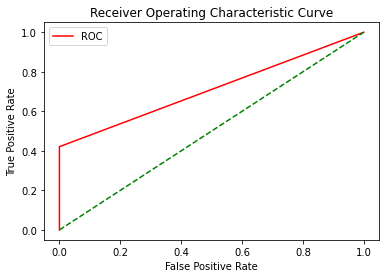

In [61]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

Feature: 0, Score: 0.27283
Feature: 1, Score: 0.18995
Feature: 2, Score: 0.11631
Feature: 3, Score: 0.02337
Feature: 4, Score: 0.12635
Feature: 5, Score: 0.27119


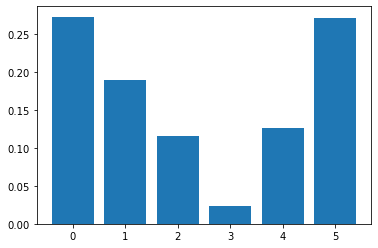

In [62]:
importance = modelo.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Tras esta tercera iteración, las métricas empeoran con el re-entrenamiento por lo que parece que el modelo ha encontrado su máximo y el re-entreno ya no ayuda más a mejorar las métricas como se vio en la iteración anterior si no que incluso puede empeorarlas como ha ocurrido en esta tercera iteración.

Tras ver varias iteraciones, se comprueba que el modelo puede mejorar con el aprendizaje activo sin embargo llega un momento donde parece existir un límite a partir del cual el modelo no mejora e incluso puede empeorar sus métricas. Esto puede deberse a que al re-entrenar los modelos, a veces la proporción de etiquetas esta muy poco balanceada. Además, para adquirir aun más mejoras es posible que fuera necesario tener más características que puedan ayudar a definir y diferenciar los patrones que el modelo tiene más dificultades para clasificar. De esta forma, podría ser que por mucho que se re-entrenase el clasificador con nuevos datos cercanos a su umbral de decisión, las características disponibles no serían suficientes para captar las diferencias claves de los patrones más dudosos que permitirían identificarlos de forma 100% precisa.
También, hay que contar con que el conjunto de test no cuenta con gran cantidad de datos por lo que este podría no mostrar de forma clara los cambios significativos en el modelo. Pese a todo, se han encontrado iteraciones donde el re-entrenamiento permite la mejora del modelo sin olvidar que con este método de re-entrenamiento cada vez se introducen más datos en el entrenamiento del modelo, lo que hace que el modelo sea más robusto y adaptado a la realidad puesto que contempla mucha más información de distintos patrones.